<a href="https://colab.research.google.com/github/fadulgabriel/CEE2/blob/main/Relat%C3%B3rio_CE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Trabalho 1

Aluno: *Gabriel Leonardo Fadul*

Matrícula: *231010920*

Disciplina: *Computação Estatística 2 em Python*

Professor: *José Augusto Fiorucci*

# Introdução

Este trabalho tem como objetivo explorar dados reais do Banco Central referentes à taxa básica de juros (Taxa Selic), por meio da geração de gráficos e análises automatizadas. O relatório foi desenvolvido em Python, utilizando o ambiente Google Colab, e permite a parametrização do intervalo de datas e dos valores analisados.



# Desenvolvimento

### Conversão de Taxas

Para execução desse projeto, foi utilizado dados reais da Taxa Selic, obtidos por meio da API do Banco Central, para calcular e apresentar três indicadores: a Taxa Selic Diária, a Taxa Selic Anual e a Taxa Selic Acumulada em determinado período selecionado. Para isso, os valores originais da taxa diária são convertidos para os demais indicadores utilizando fórmulas, conforme descritas a seguir:

$$
T_{\text{diária}} = \frac{\text{Taxa Selic Diária}}{100}
$$
<br>
$$
T_{\text{anual}}= (1 + T_{\text{diária}}) ^ {252} - 1
$$
<br>
$$
T_{\text{acumulada}} = \prod_{i=1}^{t} (1 + T_{\text{diária}}) - 1
$$

In [81]:
### Acessando a API e puxando os dados ###

# Importando as bibliotecas
import requests
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO
from google.colab import files

# Definir o intervalo de tempo
inicio = '02/03/2015'
fim = '06/03/2015'

# Acessando a API do Banco Central
url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial={inicio}&dataFinal={fim}'
resposta = requests.get(url)

# Verificando a resposta
if resposta.status_code == 200:
    # Lendo os dados CSV
    dados = pd.read_csv(StringIO(resposta.text), sep=";", header=0)
    dados.columns = ['Data', 'Taxa_Selic_Diaria']
    dados['Data'] = pd.to_datetime(dados['Data'], dayfirst=True, errors='coerce').dt.strftime('%d/%m/%Y')
else:
    raise ValueError(f"Erro ao acessar a API. Código de status: {resposta.status_code}")

In [82]:
### Convertendo as taxas ###

# Ajeitando a Taxa Diária
dados['Taxa_Selic_Diaria'] = dados['Taxa_Selic_Diaria'].astype(str).str.replace(',', '.').astype(float) / 100

# Convertendo para Taxa Anual
dados['Taxa_Selic_Anual'] = (1 + dados['Taxa_Selic_Diaria']) ** 252 - 1

# Calculando a Taxa Acumulada
dados['Taxa_Selic_Acumulada'] = (1 + dados['Taxa_Selic_Diaria']).cumprod() - 1

# Formatando para exibir em porcentagem (%)
dados['Taxa_Selic_Diaria'] = dados['Taxa_Selic_Diaria'].apply(lambda x: f"{x*100:.6f}")
dados['Taxa_Selic_Anual'] = dados['Taxa_Selic_Anual'].apply(lambda x: f"{x*100:.2f}")
dados['Taxa_Selic_Acumulada'] = dados['Taxa_Selic_Acumulada'].apply(lambda x: f"{x*100:.6f}")

A tabela a seguir apresenta as taxas Selic Diária, Anual e Acumulada para o intervalo de ***02/03/2013*** até ***06/03/2013***.

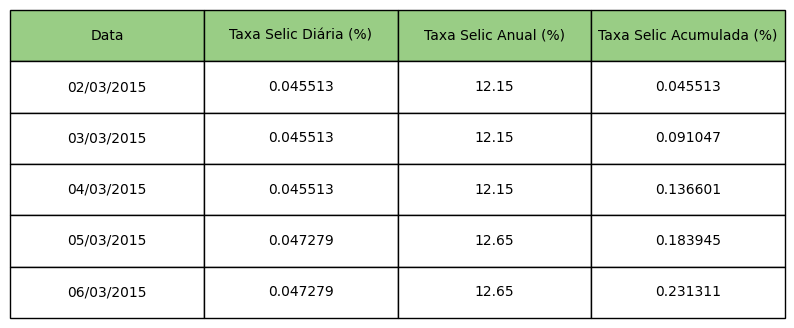

In [83]:
### Gerando a tabela padronizada ###

# Gerando a tabela usando matplotlib
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('tight')
ax.axis('off')

# Criando a tabela com o nome padronizado
tabela = ax.table(cellText=dados.values,
                 colLabels=['Data', 'Taxa Selic Diária (%)', 'Taxa Selic Anual (%)', 'Taxa Selic Acumulada (%)'],
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1],
                 colColours=["#99cd85"] * len(dados.columns))

# Ajustando as bordas das células
tabela.auto_set_font_size(False)
tabela.set_fontsize(10)
tabela.scale(1.2, 1.2)
for (i, j), cell in tabela.get_celld().items():
    cell.set_edgecolor('black')
    cell.set_linewidth(1)

plt.show()

### Visualização Gráfica

Os gráficos a seguir apresentam a evolução das Taxas Selic Diária, Anual e Acumulada ao longo do período analisado.


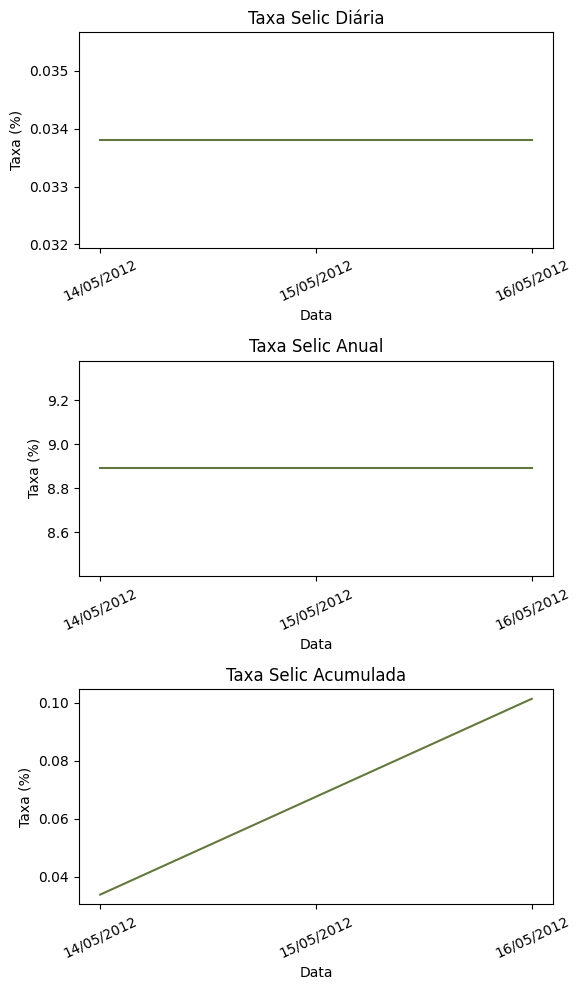

In [30]:
### Gerando os gráficos para cada taxa ###

# Criando os gráficos
fig, axs = plt.subplots(3, 1, figsize=(6, 10))

# Gráfico para a Taxa Selic Diária
axs[0].plot(dados['Data'], dados['Taxa_Selic_Diaria'].str.replace('%', '').astype(float), color='#63783d', label='Taxa Selic Diária')
axs[0].set_title('Taxa Selic Diária')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('Taxa (%)')
axs[0].tick_params(axis='x', rotation= 25)

# Gráfico para a Taxa Selic Anual
axs[1].plot(dados['Data'], dados['Taxa_Selic_Anual'].str.replace('%', '').astype(float), color='#63783d', label='Taxa Selic Anual')
axs[1].set_title('Taxa Selic Anual')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('Taxa (%)')
axs[1].tick_params(axis='x', rotation= 25)

# Gráfico para a Taxa Selic Acumulada
axs[2].plot(dados['Data'], dados['Taxa_Selic_Acumulada'].str.replace('%', '').astype(float), color='#63783d', label='Taxa Selic Acumulada')
axs[2].set_title('Taxa Selic Acumulada')
axs[2].set_xlabel('Data')
axs[2].set_ylabel('Taxa (%)')
axs[2].tick_params(axis='x', rotation= 25)

plt.tight_layout()
plt.show()


In [39]:
### Mensagem com a maior taxa anual ###

# Encontrar o maior valor
max_taxa = dados['Taxa_Selic_Anual'].max()

# Encontrar as datas correspondentes
max_taxa_data = dados[dados['Taxa_Selic_Anual'] == max_taxa]['Data'].values
data1 = max_taxa_data[0]
data2 = max_taxa_data[-1]

# Gerar frase sobre o maior período
print(f"O maior período da Selic Anual foi entre {data1} e {data2}, no qual a taxa foi de {max_taxa}% a.a.")

O maior período da Selic anual foi entre 05/03/2015 e 06/03/2015, e foi de 12.65%.


### Simulação de Investimento Único

Nesta seção, foi realizada uma simulação de investimento com um aporte único, aplicado a 100% da Taxa Selic Diária. Foi adotado a simulação um aporte de ***R$250,00*** reais no período de ***09/04/2019*** até ***16/04/2019***.


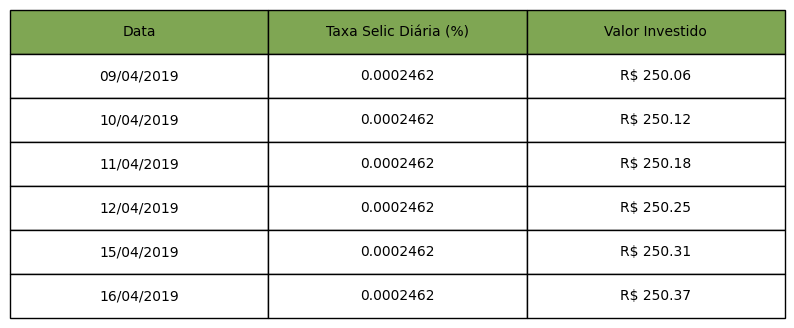

In [100]:
### Simulação Aporte Único ###

# Definir o intervalo de tempo e o valor do aporte
inicio = '09/04/2019'
fim = '16/04/2019'
valor_aporte = 250

# Acessando a API do Banco Central
url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial={inicio}&dataFinal={fim}'
resposta = requests.get(url)

# Verificando a resposta
if resposta.status_code == 200:
    # Lendo os dados CSV
    dados = pd.read_csv(StringIO(resposta.text), sep=";", header=0)
    dados.columns = ['Data', 'Taxa Selic Diária']
    dados['Data'] = pd.to_datetime(dados['Data'], dayfirst=True, errors='coerce').dt.strftime('%d/%m/%Y')

    # Ajeitando a Taxa Diária
    dados['Taxa Selic Diária'] = dados['Taxa Selic Diária'].str.replace(',', '.').astype(float) / 100

    # Convertendo o valor do aporte para formato float
    dados['Valor Investido'] = float(valor_aporte)

    # Calculando o valor investido para cada dia
    for i in range(len(dados)):
        if i == 0:
            dados.at[i, 'Valor Investido'] = valor_aporte * (1 + dados.at[i, 'Taxa Selic Diária'])
        else:
            dados.at[i, 'Valor Investido'] = dados.at[i-1, 'Valor Investido'] * (1 + dados.at[i, 'Taxa Selic Diária'])

    # Formatando o valor investido
    dados['Valor Investido'] = dados['Valor Investido'].apply(lambda x: f"R$ {x:,.2f}")

    # Gerando a tabela usando matplotlib
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')

    tabela = ax.table(cellText=dados.values,
                     colLabels=['Data', 'Taxa Selic Diária (%)', 'Valor Investido'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1],
                     colColours=["#7fa653"] * len(dados.columns))

    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1.2, 1.2)
    for (i, j), cell in tabela.get_celld().items():
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

    plt.show()

else:
    print(f"Erro ao acessar a API. Código de status: {resposta.status_code}")

### Simulação de Investimento Recorrente

Nesta seção, foi realizada uma simulação de investimento com aportes diários constantes, aplicados a 100% da Taxa Selic Diária. Cada aporte diário foi capitalizado em regime de capitalização composta, ou seja, cada aporte rende de acordo com os dias úteis até o fim do período.

O valor acumulado apresentado representa o saldo total do investimento ao final de cada dia útil. Considera-se para tabela abaixo o período de ***09/04/2019*** até ***16/04/2019*** com um aporte de ***R$250,00*** reais.




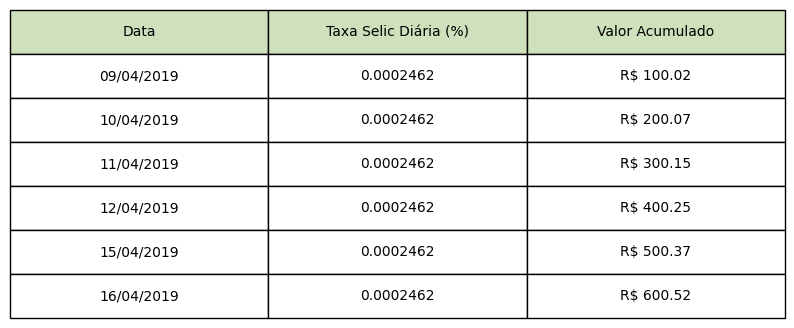

In [99]:
### Simulação de Investimento Recorrente ###

# Definir o intervalo de tempo e o valor do aporte
inicio = '09/04/2019'
fim = '16/04/2019'
aporte_diario = 100.0

# Acessando a API do Banco Central para obter a Taxa Selic Diária
url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.11/dados?formato=csv&dataInicial={inicio}&dataFinal={fim}'
resposta = requests.get(url)

# Verificando a resposta
if resposta.status_code == 200:
    # Lendo os dados CSV
    dados = pd.read_csv(StringIO(resposta.text), sep=";", header=0)
    dados.columns = ['Data', 'Taxa Selic Diária']
    dados['Data'] = pd.to_datetime(dados['Data'], dayfirst=True, errors='coerce').dt.strftime('%d/%m/%Y')

    # Ajeitando a Taxa Diária
    dados['Taxa Selic Diária'] = dados['Taxa Selic Diária'].str.replace(',', '.').astype(float) / 100

    # Inicializando a coluna do valor acumulado
    dados['Valor Acumulado'] = 0.0

    # For para calcular o valor acumulado dia a dia
    for i in range(len(dados)):
        if i == 0:
            dados.at[i, 'Valor Acumulado'] = aporte_diario * (1 + dados.at[i, 'Taxa Selic Diária'])
        else:
            saldo_anterior = dados.at[i-1, 'Valor Acumulado']
            dados.at[i, 'Valor Acumulado'] = saldo_anterior * (1 + dados.at[i, 'Taxa Selic Diária']) + aporte_diario * (1 + dados.at[i, 'Taxa Selic Diária'])

    # Formatando o valor acumulado
    dados['Valor Acumulado'] = dados['Valor Acumulado'].apply(lambda x: f"R$ {x:,.2f}")

    # Gerando a tabela com bordas usando matplotlib
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.axis('tight')
    ax.axis('off')

    # Criando a tabela com o nome padronizado
    tabela = ax.table(cellText=dados.values,
                     colLabels=['Data', 'Taxa Selic Diária (%)', 'Valor Acumulado'],
                     cellLoc='center',
                     loc='center',
                     bbox=[0, 0, 1, 1],
                     colColours=["#cfe0bc"] * len(dados.columns))

    # Ajustando as bordas das células
    tabela.auto_set_font_size(False)
    tabela.set_fontsize(10)
    tabela.scale(1.2, 1.2)
    for (i, j), cell in tabela.get_celld().items():
        cell.set_edgecolor('black')
        cell.set_linewidth(1)

    plt.show()

else:
    print(f"Erro ao acessar a API. Código de status: {resposta.status_code}")